# Project: Medical Appointment No Shows - Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
<li><a href="#gp">General Properties</a></li>
<li><a href="#dc">Data Cleaning</a></li>
        <ul>
<li><a href="#1">1 - Spelling Errors</a></li>
<li><a href="#2">2 - Date Extracting</a></li>
<li><a href="#3">3 - Age_Stage</a></li>
<li><a href="#4">4 - Handicap_Level</a></li>
        </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
        <ul>
<li><a href="#Q1">Q1 - the percentage of no-shown-up patients with scheduled appointment.</a></li>
<li><a href="#Q2">Q2 - the percentage of no-shown-up patients with scheduled appointment by gender.</a></li>
<li><a href="#Q3">Q3 - the percentage of no-shown-up patients with scheduled appointment by weekday.</a></li>
<li><a href="#Q4">Q4 - does the duration between appointment and scheduled days will change patients' minds for their attendance?</a></li>
<li><a href="#Q5">Q5 - does the age stage would affect the attendances of medical appointments?</a></li>
<li><a href="#Q6">Q6 - does different neighbourhoods will impact patients' attendances for their appoitments?</a></li>
<li><a href="#Q7">Q7 - will received sms affect the patients' attendances of their appoitments?</a></li>
<li><a href="#Q8">Q8 - is being handicapped a major factor affecting patients' attendances for their appoitments?</a></li>
<li><a href="#Q9">Q9: other factors may affect patients' attendances.</a></li>
                <ul>
<li><a href="#sch">- Scholarship</a></li>
<li><a href="#hy">- Hypertension</a></li>
<li><a href="#d">- Diabetes</a></li>
<li><a href="#al">- Alcoholism</a></li>                  
                </ul>
            </ul>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this data analysis project, we are going to investigate a dataset recording from 100k medical appointments in a public hospital in May 2016 in Brazil. 
> The dataset shows whether or not the patient showed up for their appointments as well as a number of characteristics about the partient, including: 
> - Scheduled Day
> - Appointment Day
> - Age 
> - Gender
> - Neighborhood
> - SMS Received or Not
>
This dataset is provided by the link below and the original source is on Kaggle: 
https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv

#### The aim is to try to understand :
- What factors are the most important influenting the patients not attending their medical appointments?

In [1]:
# import numpy, pandas, datetime and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
<a id='gp'></a>
### General Properties

In [2]:
# loan no-shown-up medical appointments datasets
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# view dataframe to have a general idea
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# get information about the dataframe including the columns and rows numbers, column dtypes, non-null values and memory usage. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# get information about dataset's distribution
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# check if there are duplicates in the dataset
df.duplicated().sum()

0

In [6]:
# check if there are null datas in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# check the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> With a general view of the dataset, this is a 2D table with 110527 rows and 14 columns. 
The Appointment ID is the only unique data. There is no duplicate, neither null data in the table. Therefore, we do not need to treat the duplicated and null in this case. 

<a id='dc'></a>
### Data Cleaning

<a id='1'></a>
#### *1 - Spelling Errors*
Two spelling errors are noticed and should be corrected as following: Handcap --> Handicap & Hipertension --> Hypertension.
Also No-show will be changed into 'No_show'.

In [8]:
# rename the 3 columns
df.rename(columns = {'Handcap': 'Handicap', 'Hipertension': 'Hypertension', 'No-show': 'No_show'}, inplace = True)
# verify if it is renamed correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='2'></a>
#### *2 - Date Extracting*
In this step, we are going to convert the Scheduled Day and Appointment Day by extracting only date and dropping the hour information, which should not be an important element for attendance consideration.

In [9]:
# extract only 'yyyy-mm-dd' from the string including time
df['ScheduledDay'] = df['ScheduledDay'].str[0:10]
df['AppointmentDay'] = df['AppointmentDay'].str[0:10]
# verify if the extration has been done correctly
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [10]:
# convert the type of days from string to datetime64[ns], then verify.
df_ScheduledDay = pd.to_datetime(df['ScheduledDay'])
type(df_ScheduledDay[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df_AppointmentDay = pd.to_datetime(df['AppointmentDay'])
type(df_AppointmentDay[0])

pandas._libs.tslibs.timestamps.Timestamp

Convert the appointment day to weekday and add this new column into the dataframe is for the reason to understand if the day of week matters the attendance.
Mondays are 0 and Sundays are 6.

In [12]:
# convert the date into the weekday and create a new column named Weekday
df_Weekday = pd.to_datetime(df['AppointmentDay']).dt.weekday.rename("Weekday")

Calculate the number of days between the scheduled and appointment day, then add this new column into the dataframe, in order to understand if the duration matters the attendance.

In [13]:
# calculate days between two dates and create a new column named Duration
df_Duration = (df_AppointmentDay - df_ScheduledDay).dt.days.rename('Duration')

In [14]:
# add two new columns into the inital dataset
df = pd.concat([df,df_Weekday,df_Duration],axis=1)

In [15]:
# verify if two columns are added 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday,Duration
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,0


We need to check if all appointment days are made on the same day of scheduled days or after. Drop the rows where ScheduledDay is later than AppointmentDay.

In [16]:
df[df.Duration<0].count()

PatientId         5
AppointmentID     5
Gender            5
ScheduledDay      5
AppointmentDay    5
Age               5
Neighbourhood     5
Scholarship       5
Hypertension      5
Diabetes          5
Alcoholism        5
Handicap          5
SMS_received      5
No_show           5
Weekday           5
Duration          5
dtype: int64

> There are 5 appointments were made before the scheduled days, which could be considered to be dropped.

In [17]:
df = df[(df.Duration >= 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         110522 non-null float64
AppointmentID     110522 non-null int64
Gender            110522 non-null object
ScheduledDay      110522 non-null object
AppointmentDay    110522 non-null object
Age               110522 non-null int64
Neighbourhood     110522 non-null object
Scholarship       110522 non-null int64
Hypertension      110522 non-null int64
Diabetes          110522 non-null int64
Alcoholism        110522 non-null int64
Handicap          110522 non-null int64
SMS_received      110522 non-null int64
No_show           110522 non-null object
Weekday           110522 non-null int64
Duration          110522 non-null int64
dtypes: float64(1), int64(10), object(5)
memory usage: 14.3+ MB


<a id='3'></a>
#### *3 - Age_Stage*
In the previous general investigation, we realise that there are 104 values for variable 'Age'. I would like to investigate more to understand if all the information is pertinent.

In [18]:
# check the age datas by order
df_age = df['Age'].unique()
df_age.sort()
print('age', df_age)
#same to == print('Age:', sorted(df['Age'].unique()))

age [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [19]:
# count appointment numbers for each age
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1628
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1544
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      433
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

> We could notice: 
> - there is an impossible age -1 that we need to drop this data information;
> - some ages beyon 98 years-old are rare in human beings, thus I will treat these information as outliners and drop them.

In [20]:
# drop the data with age < 0 and age >=98
df = df[(df.Age >= 0) & (df.Age < 98)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110503 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         110503 non-null float64
AppointmentID     110503 non-null int64
Gender            110503 non-null object
ScheduledDay      110503 non-null object
AppointmentDay    110503 non-null object
Age               110503 non-null int64
Neighbourhood     110503 non-null object
Scholarship       110503 non-null int64
Hypertension      110503 non-null int64
Diabetes          110503 non-null int64
Alcoholism        110503 non-null int64
Handicap          110503 non-null int64
SMS_received      110503 non-null int64
No_show           110503 non-null object
Weekday           110503 non-null int64
Duration          110503 non-null int64
dtypes: float64(1), int64(10), object(5)
memory usage: 14.3+ MB


<a id='4'></a>
#### *4 - Handicap_Level*

In [21]:
# count the appointment numbers for each handicap level
df['Handicap'].value_counts()

0    108270
1      2034
2       183
3        13
4         3
Name: Handicap, dtype: int64

> This column contains a integer rating for handicap level from 0 to 4. The value of level 2 to 4 are rares, thus we will group all level > 0 data together as level 1. Here, I a going to replace all the value > 1 to 1.

In [22]:
# modify all values > 1 in 'Handicap' column to 1
df.loc[df.Handicap > 1, 'Handicap'] = 1
# verify if Handicap column contains only two values 0 or 1
df['Handicap'].value_counts()

0    108270
1      2233
Name: Handicap, dtype: int64

In [23]:
# verify the dataset if all changes are done
df.nunique()

PatientId          62286
AppointmentID     110503
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                   98
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               2
SMS_received           2
No_show                2
Weekday                6
Duration             129
dtype: int64

<a id='eda'></a>
### Exploratory Data Analysis

<a id='Q1'></a>
#### Research Question 1: the percentage of no-shown-up patients with scheduled appointment.

Before analysing the variables which may affect the patients' attendancs, we would like to have a idea about the propotion of the shown-up and non-shown-up patients.

In [24]:
# count number of patients shown or not their appointments:
df['No_show'].value_counts()

No     88193
Yes    22310
Name: No_show, dtype: int64

In [25]:
# define the percentage function, total here is the number of rows
def percentage(number, total):
    return number / total

In [26]:
# calculate the percentage of patients did not presented
df_nshow = df[df.No_show == 'Yes']
number_noshow = df_nshow['No_show'].count()
per_noshow = percentage(number_noshow, total = 110508)
print(per_noshow)

0.2018858363195425


In [27]:
# calculate the percentage of patients who presented
df_show = df[df['No_show'] == 'No']
number_show = df_show['No_show'].count()
per_show = percentage(number_show, total = 110508)
print(per_show)

0.7980689180873783


#### <span style="color:blue">*Figure: Percentage of present patients* </span>

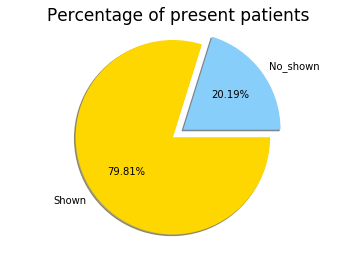

In [28]:
# draw a pie graph to show the percentage of the patients presented or not
sizes = np.array([per_noshow, per_show])
labels = 'No_shown', 'Shown'
colors = ["lightskyblue", "gold"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 1.5)
plt.title('Percentage of present patients', fontsize = 17, loc = 'center', color = 'k')
plt.axis('equal') # equal aspect ratio to ensure that pie is drawn as a circle
plt.show()

> From the chart, we notice that there is 20.19% of patients who have not shown up during their scheduled meical appointments.

<a id='Q2'></a>
### Research Question 2: the percentage of no-shown-up patients with scheduled appointment by gender.

Is there more female patients absented their medical appointments than male? In this section, we are going to investigate the gender factor.
We compared at first if there are more appointments scheduled for woman than man, and then compared the absence percentage for each gender.

In [29]:
# count number of shown and non-shown patients by gender
df_g = df['No_show'].groupby(df['Gender']).value_counts()
# display the result
df_g

Gender  No_show
F       No         57234
        Yes        14587
M       No         30959
        Yes         7723
Name: No_show, dtype: int64

#### <span style="color:blue">*Figure: Number of shown-up or not patients with scheduled appointment by gender* </span>

Text(0,0.5,'Number of patient')

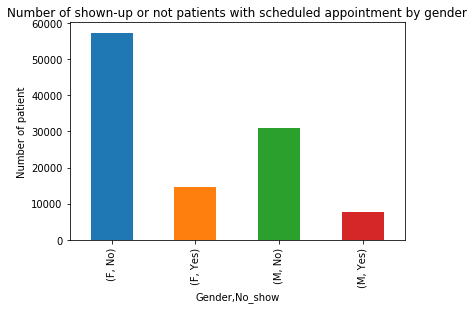

In [30]:
df_g.plot(x=['No_shown', 'Shown'], y=['No', 'Yes'], kind ='bar', title = 'Number of shown-up or not patients with scheduled appointment by gender')
plt.ylabel('Number of patient')

In [31]:
# calculate total female patients
df_f = df[df['Gender'] == 'F']
total_f = df_f['Gender'].count()
# calculate percentage of female patients no-shown-up and shown-up
df_fns = df_f[df_f.No_show == 'Yes']
number_fns = df_fns.No_show.count()
per_fns = percentage(number_fns, total_f) #percentage of female no-shown-up
per_fs = 1-per_fns #percentage of female shown-up
print(per_fns, per_fs)

0.20310215675081103 0.796897843249189


In [32]:
# calculate total male patients
df_m = df[df['Gender'] == 'M']
total_m = df_m['Gender'].count()
# calculate percentage of male patients no-shown-up and shown-up
df_mns = df_m[df_m.No_show == 'Yes']
number_mns = df_mns.No_show.count()
per_mns = percentage(number_mns, total_m) #percentage of female no-shown-up
per_ms = 1-per_mns #percentage of female shown-up
print(per_mns, per_ms)

0.199653585647071 0.800346414352929


#### <span style="color:blue">*Figure: Percentage by presence and gender* </span>

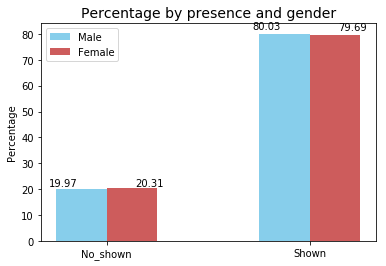

In [33]:
f = (round(per_fns*100,2), round(per_fs*100,2))
m = (round(per_mns*100,2), round(per_ms*100,2))
ind = np.arange(len(m))
width = 0.25

fig,ax = plt.subplots()
rects1 = ax.bar(ind - width/2, m, width,
                color='SkyBlue', label='Male')
rects2 = ax.bar(ind + width/2, f, width,
                color='IndianRed', label='Female')

ax.set_ylabel('Percentage')
ax.set_title('Percentage by presence and gender', fontsize = 14)
ax.set_xticks(ind)
ax.set_xticklabels(('No_shown', 'Shown'))
ax.legend()

def autolabel(rects, xpos='center'):

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")
plt.show()

#### <span style="color:blue">*Figure: Percentage of female patients presented or not* </span>

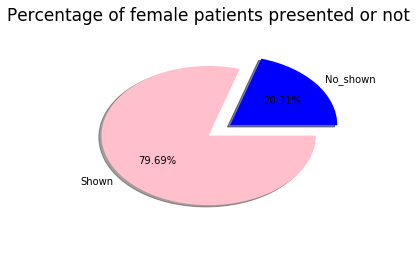

In [34]:
sizes = np.array([per_fns, per_fs])
labels = 'No_shown', 'Shown'
colors = ["Blue", "Pink"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 0.8)
plt.title('Percentage of female patients presented or not', fontsize = 17, loc = 'center', color = 'k')
plt.show()

#### <span style="color:blue">*Figure: Percentage of male patients presented or not* </span>

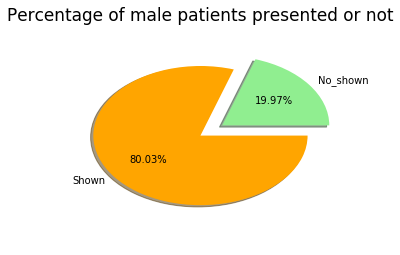

In [35]:
sizes = np.array([per_mns, per_ms])
labels = 'No_shown', 'Shown'
colors = ["Lightgreen", "Orange"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 0.8)
plt.title('Percentage of male patients presented or not', fontsize = 17, loc = 'center', color = 'k')
plt.show()

> **Gender**: Around 20% patients with scheduled appoinment have not attended, with a quasi-equal percentage between femal (20.31%) and male patients (19.97%). 
However, we can see that women care more their health than men, almost double women made medical appointments more than men.

<a id='Q3'></a>
#### Research Question 3: the percentage of no-shown-up patients with scheduled appointment by day of week.

Here, we are interestig in on which day, there are the most appointments made? Among different weekdays, is there a preference for the patients' attendance?  

In [36]:
# count numbers of appointments by weekday
df['Weekday'].value_counts()

2    25864
1    25635
0    22710
4    19013
3    17242
5       39
Name: Weekday, dtype: int64

In [37]:
# calculate the percentage of appointments on each weekday
per_weekday = df['Weekday'].value_counts() / len(df['Weekday'])
per_weekday

2    0.234057
1    0.231985
0    0.205515
4    0.172059
3    0.156032
5    0.000353
Name: Weekday, dtype: float64

#### <span style="color:blue">*Figure: Percentage of appointment by weekday* </span>

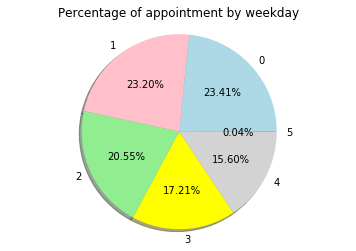

In [38]:
sizes = np.array(per_weekday)
labels = '0', '1', '2', '3', '4','5'
colors = ["LightBlue", "Pink", 'LightGreen', 'Yellow', 'lightgrey', 'indianred']
explode = [0, 0, 0, 0, 0, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 0.8)
plt.title('Percentage of appointment by weekday')
plt.axis('equal')
plt.show()

> We realised that the majority of the appointment days are concentrated on Tuesday (1) and Wednesday (0). There are very few appointments made on Saturday (5) and no appointment on Sunday (6).

In [39]:
# count numbers of appointments shown and non-shown by different weekdays
df['No_show'].groupby(df['Weekday']).value_counts()

Weekday  No_show
0        No         18022
         Yes         4688
1        No         20485
         Yes         5150
2        No         20772
         Yes         5092
3        No         13907
         Yes         3335
4        No         14977
         Yes         4036
5        No            30
         Yes            9
Name: No_show, dtype: int64

In [40]:
# count the total number of patients by different weekdays
df_wd = df.groupby(df['Weekday']).count()
df_wd['No_show']

Weekday
0    22710
1    25635
2    25864
3    17242
4    19013
5       39
Name: No_show, dtype: int64

In [41]:
# count the number of shown-up patients by different weekdays
df_wd_show = df_show.groupby(df['Weekday']).count()
df_wd_show['No_show']

Weekday
0    18022
1    20485
2    20772
3    13907
4    14977
5       30
Name: No_show, dtype: int64

In [42]:
# calculate the percentage of shown-up appointments for each weekday
df_wd_p = df_wd_show['No_show']/df_wd['No_show']
df_wd_p

Weekday
0    0.793571
1    0.799103
2    0.803124
3    0.806577
4    0.787724
5    0.769231
Name: No_show, dtype: float64

#### <span style="color:blue">*Figure: Attendance percentage by day of week* </span>

Text(0,0.5,'Attendance percentage')

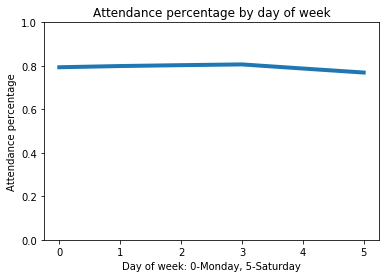

In [43]:
plt.plot(df_wd_p.index, df_wd_p, linewidth=4);
plt.title('Attendance percentage by day of week')
plt.ylim(ymin=0, ymax=1)
plt.xlabel('Day of week: 0-Monday, 5-Saturday')
plt.ylabel('Attendance percentage')

> From this gragh, we can see that patients present more on Wednesday and Thursday.
However, the difference of attendance percetage between different weekdays is very small.

<a id='Q4'></a>
#### Research Question 4: does the duration between appointment and scheduled day will change patients' minds for their attendances?

Normally, longer we wait, more chance we miss the appointments.
In this section, we will verify if there is a positive or negative correlation between the probability of patients' attendance and the period that they waited.
We also like to understand, on general, how long the patients would wait for in this public hospital.

In [44]:
# describe the center and the shape of the dataset for duration
df.Duration.describe()

count    110503.000000
mean         10.183461
std          15.253748
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Duration, dtype: float64

#### <span style="color:blue">*Figure: Number of patients by duration between scheduled and appointment day* </span>

Text(0,0.5,'Number of patients')

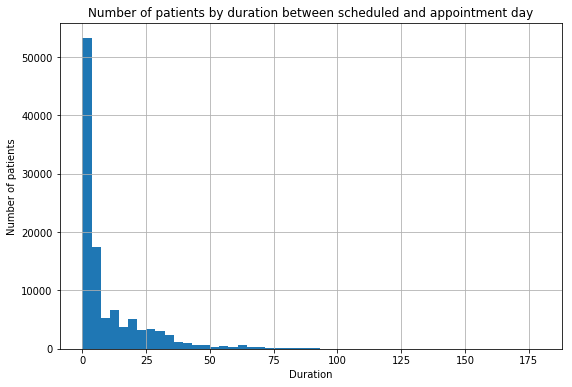

In [45]:
df.Duration.hist(bins =50, figsize = (9, 6));
plt.title('Number of patients by duration between scheduled and appointment day')
plt.xlabel('Duration')
plt.ylabel('Number of patients')

In [46]:
# convert days into 4 stages and creat a new dataframe with columns in need.
bin_edges = [-0.1, 0.1, 4, 15, 179]
bin_names = ["Sameday", "2-4Days", "5-15Days", ">15Days"]
df['Days_stage'] = pd.cut(df['Duration'], bin_edges, labels = bin_names)
df_d = pd.concat([df.Duration, df.Days_stage, df.No_show], axis =1)
df_d.shape

(110503, 3)

#### *Calculate the percentage of each duration*

In [47]:
# calculate the number of total patients by duration group
df_d_g = df_d.groupby('Days_stage')['No_show'].count()
df_d_g

Days_stage
Sameday     38558
2-4Days     19960
5-15Days    25745
>15Days     26240
Name: No_show, dtype: int64

In [48]:
# calculate the percentge of each duration group
per_dg = df_d_g / df_d['No_show'].count()
per_dg

Days_stage
Sameday     0.348932
2-4Days     0.180629
5-15Days    0.232980
>15Days     0.237460
Name: No_show, dtype: float64

#### <span style="color:blue">*Figure: Percentage of different durations between scheduled and appointment day* </span>

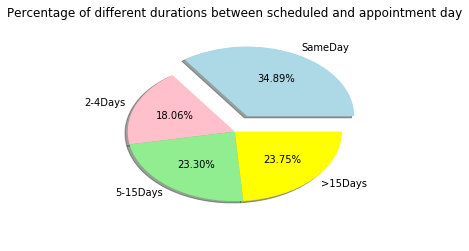

In [49]:
sizes = np.array(per_dg)
labels = 'SameDay', '2-4Days', '5-15Days', '>15Days'
colors = ["LightBlue", "Pink", 'LightGreen', 'Yellow']
explode = [0.2, 0, 0, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 0.8)
plt.title('Percentage of different durations between scheduled and appointment day')
plt.show()

##### Calculate the percentage of attendance by days between scheduled and appointment days

In [50]:
# global idea about the number of sample in each duration group
df_d.groupby(['Days_stage', 'No_show']).count()

Duration
Days_stage No_show          
Sameday    No          36766
           Yes          1792
2-4Days    No          15372
           Yes          4588
5-15Days   No          18398
           Yes          7347
>15Days    No          17657
           Yes          8583

In [51]:
# calculate the number of shown-up patients by duration group
df_d_sh = df_d[df.No_show == 'No'].groupby('Days_stage')['No_show'].count()

In [52]:
# calculate the number of total patients by duration group
df_d_total = df_d.groupby('Days_stage')['No_show'].count()

In [53]:
# calculate the percentage of shown_up patients for each duration group
per_d_sh = df_d_sh / df_d_total
per_d_sh

Days_stage
Sameday     0.953525
2-4Days     0.770140
5-15Days    0.714624
>15Days     0.672904
Name: No_show, dtype: float64

#### <span style="color:blue">*Figure: Percentage of different durations between scheduled and appointment day* </span>

Text(0.5,1,'Attendance percentage of duration between scheduled and appointment day')

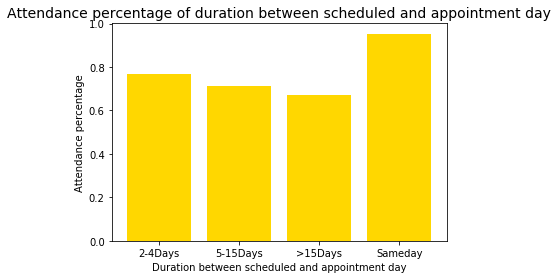

In [54]:
plt.bar(per_d_sh.index, per_d_sh, color = 'gold')
plt.xlabel('Duration between scheduled and appointment day')
plt.ylabel('Attendance percentage')
plt.title('Attendance percentage of duration between scheduled and appointment day', size = 14)

> We could see that:
> - around 35% apppointments are made for the same day and the percentage of attendance is over 95%.
> - more days between scheduled days and appointment days that patients should wait for, less patients will show up for the medical appointments: the attendance for duration of 5-15 days and of over 15 daysonly are only 71.5% and 67.3% of  respectively.
> - around one-fourth appointment days are made for 15 days after, this is a point should be consider to ameliorate.

<a id='Q5'></a>
#### Research Question 5: people of which age stage maybe not show up their medical appointments.

The attendance may depend on age as well. Older people have more free time, while younger are sometimes busier. However, is it a key factior affecting the attendance in this hospital? Let's study.

In [55]:
# describe the center and the shape of the dataset for age
df.Age.describe()

count    110503.000000
mean         37.078541
std          23.095959
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          97.000000
Name: Age, dtype: float64

In [56]:
# convert ages into 4 stages and creat a new age stage column.
bin_edges = [-0.1, 18, 37, 55, 97]
bin_names = ["Young", "Junior", "Senior", "Old"]
df['Age_stage'] = pd.cut(df['Age'], bin_edges, labels = bin_names)
df_a = pd.concat([df,df.Age_stage], axis =1)
df_a.shape

(110503, 19)

In [57]:
# count the number of patient by age stage group
df_as = df.groupby(df.Age_stage).count()
df_as['No_show']

Age_stage
Young     28865
Junior    27248
Senior    26905
Old       27485
Name: No_show, dtype: int64

In [58]:
# count the number of shown-up patients by age stage
df_as_show = df[df.No_show == 'No'].groupby('Age_stage').count()
df_as_show['No_show']

Age_stage
Young     22519
Junior    20836
Senior    21651
Old       23187
Name: No_show, dtype: int64

In [59]:
# calculat the percentage of shown-up patients in different age stage groups
df_as_p = df_as_show['No_show'] / df_as['No_show']
df_as_p

Age_stage
Young     0.780149
Junior    0.764680
Senior    0.804720
Old       0.843624
Name: No_show, dtype: float64

#### <span style="color:blue">*Figure: Attendance percentage by age stage* </span>

Text(0.5,1,'Attendance percentage by age stage')

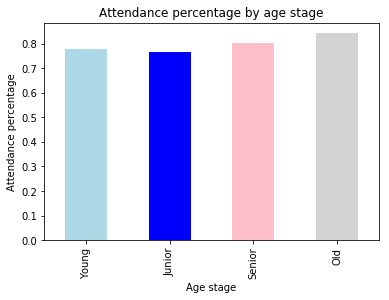

In [60]:
color = ['lightblue', 'blue', 'pink', 'lightgrey']
df_as_p.plot(x=[df_as_p.index], y=[df_as_p], kind ='bar', color = color)
plt.xlabel('Age stage')
plt.ylabel('Attendance percentage')
plt.title('Attendance percentage by age stage')

> **Age**: Among 110508 samples collected, the number that people having made appointments are very similar in four different age stages. 
> However, junior and young people with ages respectively between 18-37 and under 18 years-old seem being absent their medical appointments more than senoir and old groups. This is maybe due to :
> - lack of time for the reasons such as study or work;
> - quicker self-recovery of younger people than older one.

#### *The age distribution of no-shown-up patients by gender*

In [61]:
# describe the center and the shape of the dataset for age by gender

df[df.No_show == 'Yes'].groupby(['Gender'], as_index = True)['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,14587.0,36.140810,21.148838,0.0,20.0,34.0,52.0,97.0
M,7723.0,30.835168,22.973429,0.0,10.0,28.0,49.0,97.0


#### <span style="color:blue">*Figure: Age distribution of no-shown-up patients by gender* </span>

Text(0,0.5,'Number of absence')

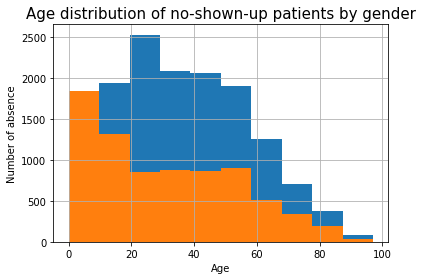

In [62]:
df[df.No_show == 'Yes'].groupby(['Gender'])['Age'].hist();
plt.title('Age distribution of no-shown-up patients by gender', size = 15)
plt.xlabel('Age')
plt.ylabel('Number of absence')

> **Age & Gender**: We could notice that 
> - the average age of female patients who did not show up is about 36 years-old, compared with about 31 years-old for men;
> - the majority of absent female patients are under 34 years-old, compared with 28 years-old for men.

<a id='Q6'></a>
#### Research Question 6: does different neighbourhood impact  patients' attendances for their appoitments?

The location where patients live could also be a factor for attendance. Maybe it depends on how far or some other reasons, such as no medical services provided in that place. Before understanding the underlaying reasons for the location, we need to understand if it is really a key factor.

In [63]:
# count the attendance number by different neighbourhoods
df['No_show'].groupby(df['Neighbourhood']).value_counts()

Neighbourhood        No_show
AEROPORTO            No            7
                     Yes           1
ANDORINHAS           No         1740
                     Yes         518
ANTÔNIO HONÓRIO      No          220
                     Yes          50
ARIOVALDO FAVALESSA  No          220
                     Yes          62
BARRO VERMELHO       No          332
                     Yes          91
BELA VISTA           No         1523
                     Yes         384
BENTO FERREIRA       No          665
                     Yes         193
BOA VISTA            No          254
                     Yes          58
BONFIM               No         2221
                     Yes         549
CARATOÍRA            No         1974
                     Yes         591
CENTRO               No         2631
                     Yes         703
COMDUSA              No          254
                     Yes          56
CONQUISTA            No          688
                     Yes         160
CONSOLAÇÃ

In [64]:
# count the number of patients from different neighbourhoods
df1 = df.groupby(df['Neighbourhood']).count()
df1['No_show']

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2258
ANTÔNIO HONÓRIO         270
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
BELA VISTA             1907
BENTO FERREIRA          858
BOA VISTA               312
BONFIM                 2770
CARATOÍRA              2565
CENTRO                 3334
COMDUSA                 310
CONQUISTA               848
CONSOLAÇÃO             1375
CRUZAMENTO             1398
DA PENHA               2217
DE LOURDES              305
DO CABRAL               560
DO MOSCOSO              413
DO QUADRO               848
ENSEADA DO SUÁ          235
ESTRELINHA              538
FONTE GRANDE            682
FORTE SÃO JOÃO         1889
FRADINHOS               258
GOIABEIRAS              700
GRANDE VITÓRIA         1071
GURIGICA               2018
HORTO                   175
ILHA DAS CAIEIRAS      1071
                       ... 
PARQUE INDUSTRIAL         1
PARQUE MOSCOSO          802
PIEDADE                 452
PONTAL DE CAMBURI        69
PRAIA 

In [65]:
# count the number of patients who have shown up from different neighbourhoods
df2 = df_show.groupby(df['Neighbourhood']).count()
df2['No_show']

Neighbourhood
AEROPORTO                 7
ANDORINHAS             1740
ANTÔNIO HONÓRIO         220
ARIOVALDO FAVALESSA     220
BARRO VERMELHO          332
BELA VISTA             1523
BENTO FERREIRA          665
BOA VISTA               254
BONFIM                 2221
CARATOÍRA              1974
CENTRO                 2631
COMDUSA                 254
CONQUISTA               688
CONSOLAÇÃO             1139
CRUZAMENTO             1094
DA PENHA               1788
DE LOURDES              258
DO CABRAL               472
DO MOSCOSO              321
DO QUADRO               708
ENSEADA DO SUÁ          183
ESTRELINHA              432
FONTE GRANDE            533
FORTE SÃO JOÃO         1543
FRADINHOS               210
GOIABEIRAS              563
GRANDE VITÓRIA          854
GURIGICA               1562
HORTO                   133
ILHA DAS CAIEIRAS       836
                       ... 
PARQUE INDUSTRIAL         1
PARQUE MOSCOSO          623
PIEDADE                 364
PONTAL DE CAMBURI        57
PRAIA 

#### <span style="color:blue">*Figure: Number of patients shown-up by Neighbourhood* </span>

Text(0.5,1,'Number of patients shown-up by Neighbourhood')

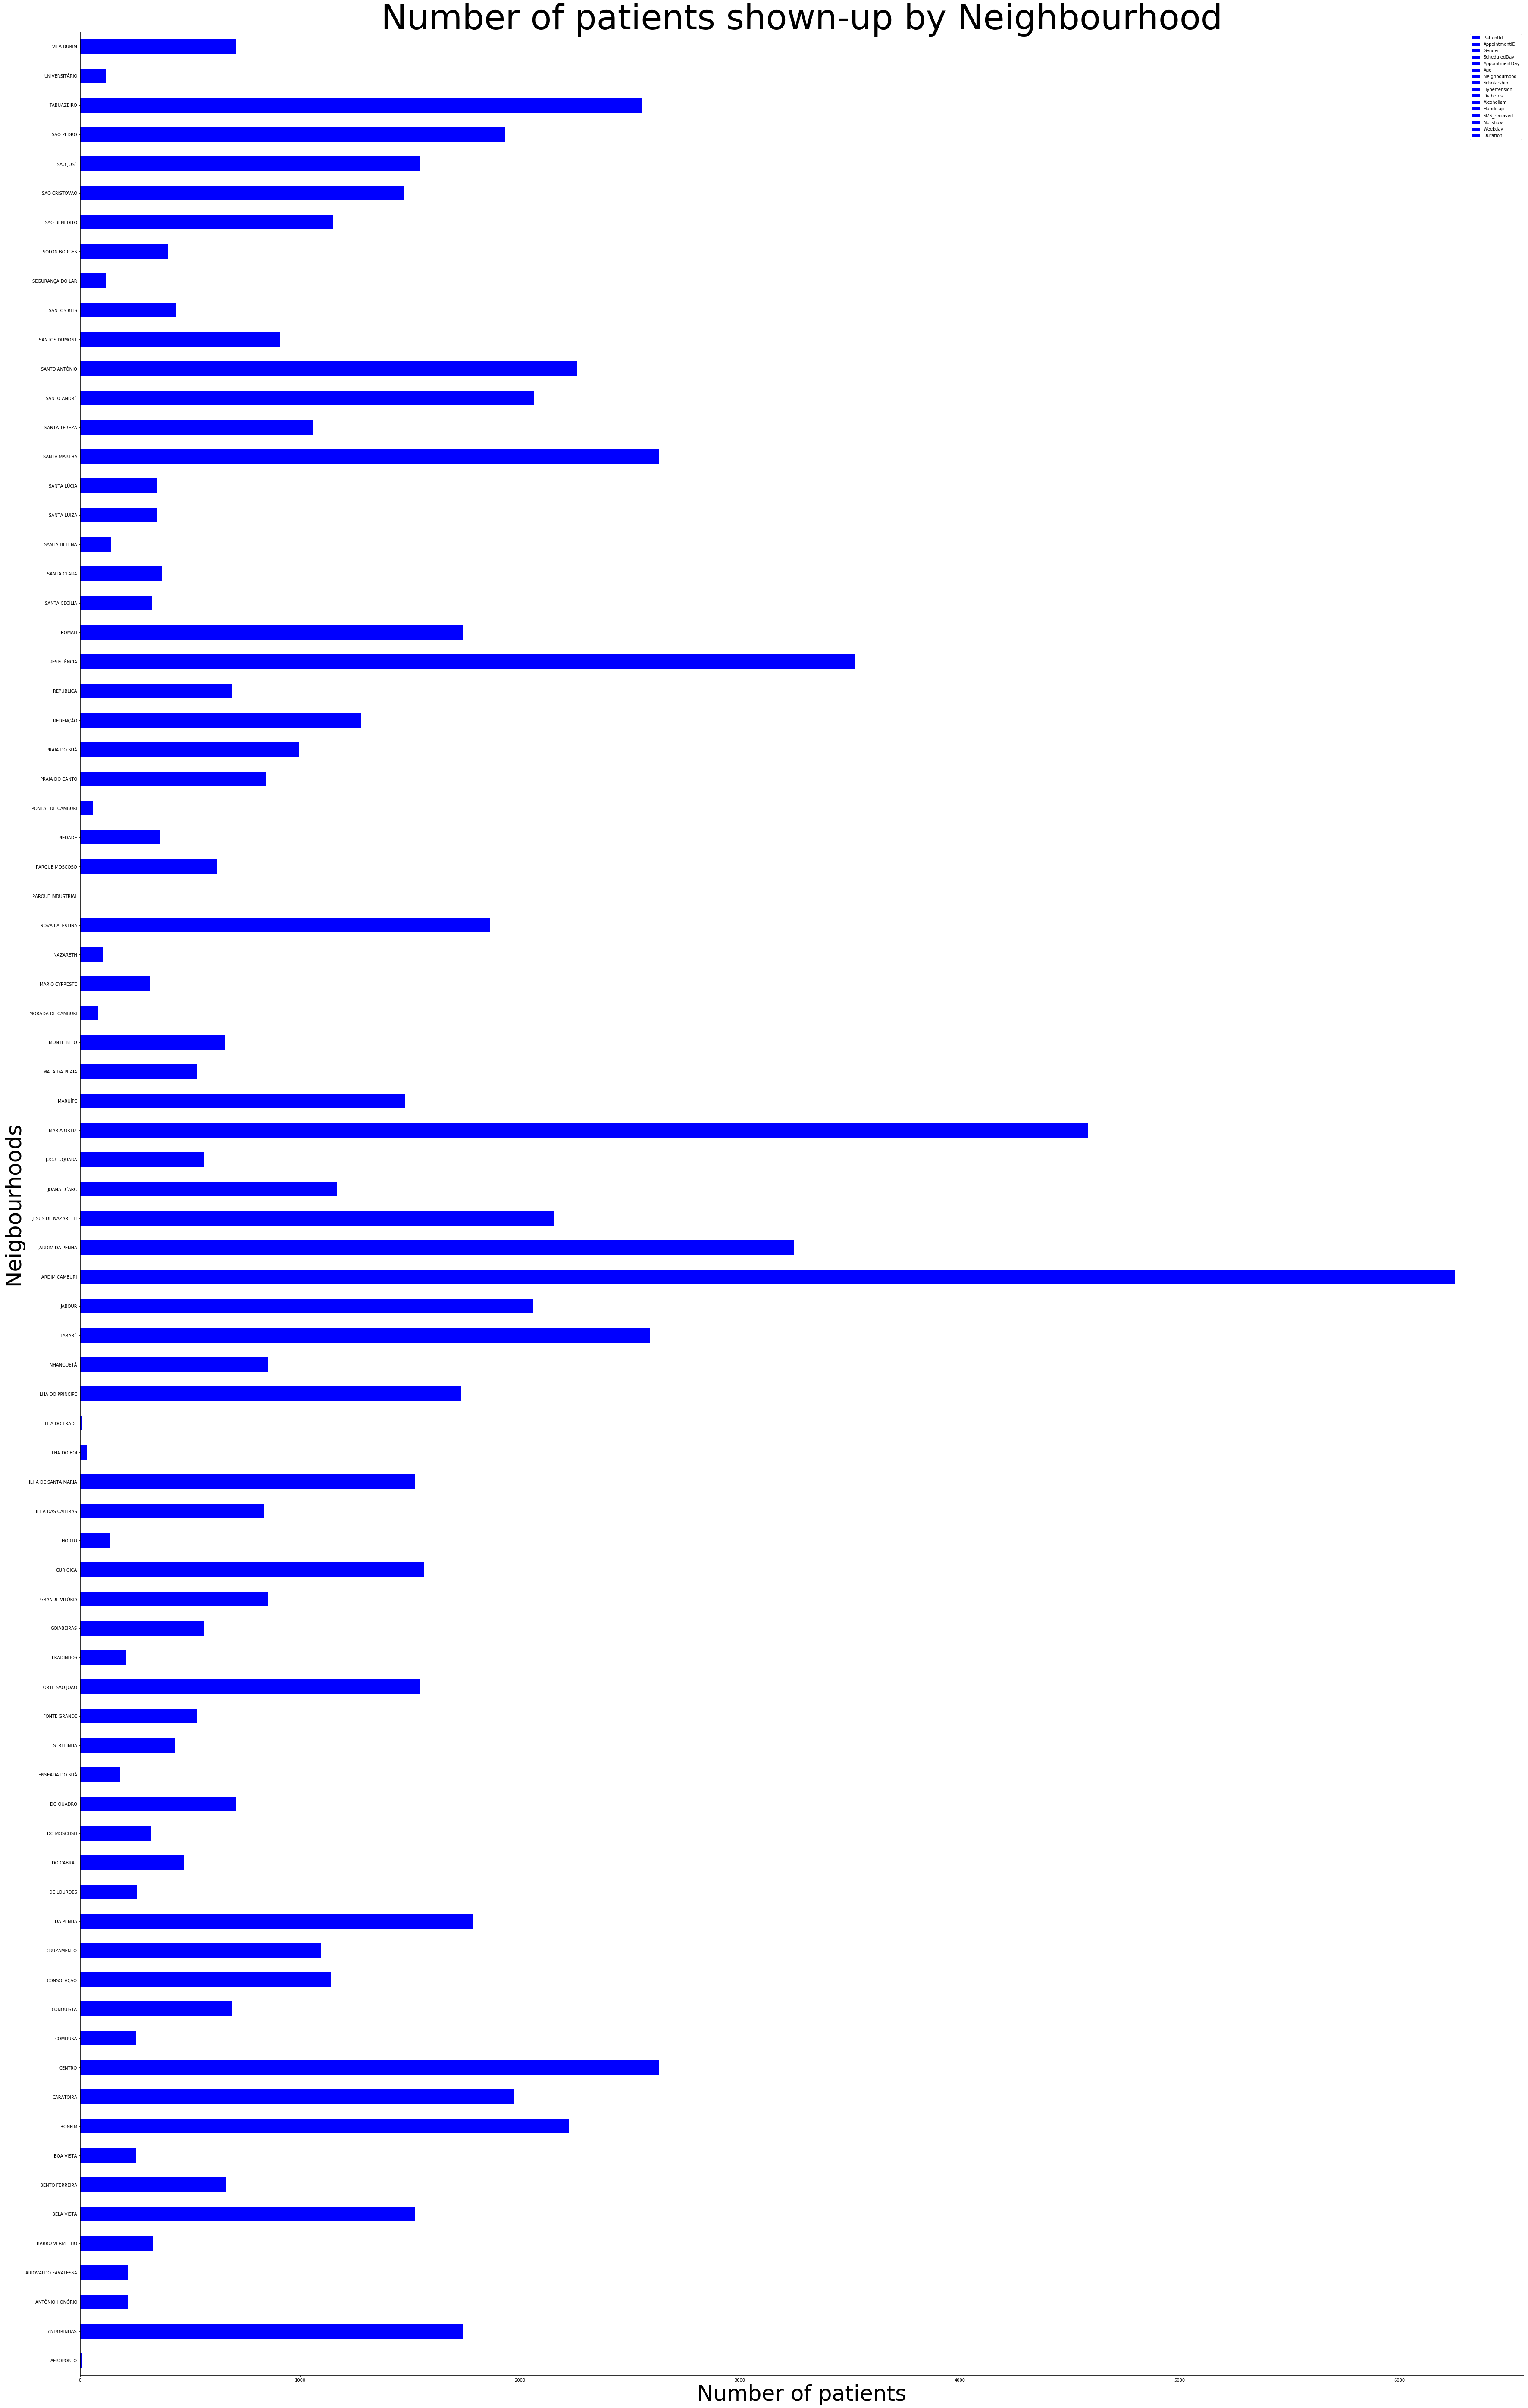

In [66]:
ax = df2.plot(kind = 'barh', figsize = (60, 100), color = 'blue');
ax.set_ylabel('Neigbourhoods', fontsize=50)
ax.set_xlabel('Number of patients', fontsize=50)
ax.set_title('Number of patients shown-up by Neighbourhood',fontsize=80)

In [67]:
# calculate the percentage of shown-up patients in each neighborhood
df_p = df2['No_show'] / df1['No_show']
print(df_p)

Neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.770593
ANTÔNIO HONÓRIO        0.814815
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
BELA VISTA             0.798637
BENTO FERREIRA         0.775058
BOA VISTA              0.814103
BONFIM                 0.801805
CARATOÍRA              0.769591
CENTRO                 0.789142
COMDUSA                0.819355
CONQUISTA              0.811321
CONSOLAÇÃO             0.828364
CRUZAMENTO             0.782546
DA PENHA               0.806495
DE LOURDES             0.845902
DO CABRAL              0.842857
DO MOSCOSO             0.777240
DO QUADRO              0.834906
ENSEADA DO SUÁ         0.778723
ESTRELINHA             0.802974
FONTE GRANDE           0.781525
FORTE SÃO JOÃO         0.816834
FRADINHOS              0.813953
GOIABEIRAS             0.804286
GRANDE VITÓRIA         0.797386
GURIGICA               0.774034
HORTO                  0.760000
ILHA DAS CAIEIRAS      0.780579
                         .

In [68]:
# calculate the average of attendance percentage for all the neigborhoods
df_p.mean()

0.8045171432767505

#### <span style="color:blue">*Figure: Percentage of patients shown-up by neighbourhoods* </span>

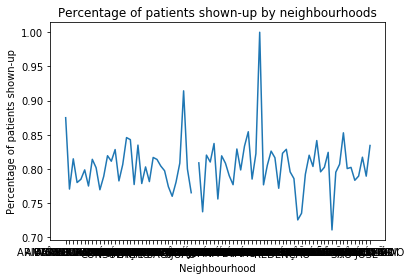

In [69]:
plt.plot(df_p)
#plt.plot(figsize = (100, 100))
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage of patients shown-up')
plt.title('Percentage of patients shown-up by neighbourhoods')
plt.show()

> This graph shows the percentage of the patients shown-up by different neigbourhoods. We could noticed that:
> - on average, around 20% of patients have not shown up for the medical appointment, which corresponds to the first general investigation that we found (20.19% no-shown-up patients).
> - all the neigbourhoods have an attendance rate above 70%.

<a id='Q7'></a>
#### Research Question 7: will received sms affect the patients' attendances of their appoitments?

Along with the essort of technology, lots of organisations like using SMS notification to reminder their patients appointments.
However, is it really an efficace method for this public hospital in Brazil? Let's investigate more...

In [70]:
# count the number of patients shown or non-shown by having received an SMS notification or not
df_sms = df['No_show'].groupby(df['SMS_received']).value_counts()
df_sms

SMS_received  No_show
0             No         62499
              Yes        12526
1             No         25694
              Yes         9784
Name: No_show, dtype: int64

In [71]:
# calculate the number of patients who have shown up
df_show['No_show'].count()

88193

In [72]:
# count the number of patients who have shown up recived an SMS
df_show_sms = df_show[(df_show.SMS_received == 0)]
df_show_sms['No_show'].count()

62499

In [73]:
# calculate the percentage of patients showed up with a recieved SMS
sms_shown = percentage(df_show_sms['No_show'].count(), df_show['No_show'].count())
sms_shown

0.7086616851677571

In [74]:
# count the number of the patients who have not shown up
df_nshow['No_show'].count()

22310

In [75]:
# count the number of patients who have not shown , but recived an SMS
df_nshow_sms = df_nshow[(df_nshow.SMS_received == 0)]
df_nshow_sms['No_show'].count()

12526

In [76]:
# calculate the percentage of patients did not show up, but with a recieved SMS
sms_nshown = percentage(df_nshow_sms['No_show'].count(), df_nshow['No_show'].count())
sms_nshown

0.5614522635589422

#### <span style="color:blue">*Figure: Percentage by presence with a received SMS or not* </span>

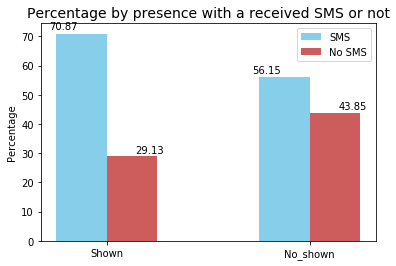

In [77]:
sms = (round(sms_shown*100,2), round(sms_nshown*100,2))
nsms = (round((1-sms_shown)*100,2), round((1-sms_nshown)*100,2))
ind = np.arange(len(m))
width = 0.25

fig,ax = plt.subplots()
rects1 = ax.bar(ind - width/2, sms, width,
                color='SkyBlue', label='SMS')
rects2 = ax.bar(ind + width/2, nsms, width,
                color='IndianRed', label='No SMS')

ax.set_ylabel('Percentage')
ax.set_title('Percentage by presence with a received SMS or not', fontsize = 14)
ax.set_xticks(ind)
ax.set_xticklabels(('Shown', 'No_shown'))
ax.legend()

def autolabel(rects, xpos='center'):

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")
plt.show()

> **SMS**: Sending an SMS could be a method to promote patients' atendances. From the chart above, we observe that the probability of attendance for patient having received an SMS is about 70.87%, compared with 56.16% for those who did not received an SMS notification.

### During following two questions, we are going to analyse if being hadicapped, hypertensive, diabetic, alcoholic and being covered by welfare are elements important for patients' attendance.

<a id='Q8'></a>
#### Research Question 8: is being handicapped a major factor affecting patients' attendances for their appoitments?

In [78]:
# count the number of patients shown or non-shown by being handicapped or not
df['No_show'].groupby(df['Handicap']).value_counts()

Handicap  No_show
0         No         86362
          Yes        21908
1         No          1831
          Yes          402
Name: No_show, dtype: int64

In [79]:
# count the number of normal patients who have shown up
df_show_nh = df_show[(df_show.Handicap == 0)]
df_show_nh['No_show'].count()

86362

In [80]:
# calculate the percentage of normal patients who have shown up
nh_shown = percentage(df_show_nh['No_show'].count(), df_show['No_show'].count())
nh_shown

0.9792387150907669

In [81]:
# count the number of normal patients who have not shown up
df_nshow_nh = df_nshow[(df_nshow.Handicap == 0)]
df_nshow_nh['No_show'].count()

21908

In [82]:
# calculate the percentage of handicapped patients who have shown up
nh_nshown = percentage(df_nshow_nh['No_show'].count(), df_nshow['No_show'].count())
nh_nshown

0.981981174361273

> The two percentages of normal patients shown-up or not are really approximate. Therefore, being handicapped would not be a factor impacting the attendance.

<a id='Q9'></a>
#### Research Question 9: other factor may affect patients' attendances

In [83]:
# creat a new dataframe only with the columns in need for investigation in order to increase the performance
df_new = pd.concat([df.Scholarship, df.Hypertension, df.Diabetes, df.Alcoholism, df.No_show], axis = 1)

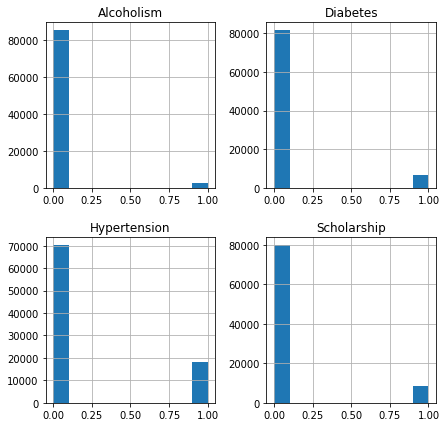

In [84]:
# extract the shown-up patients' data 
df_new_show = df_new[df_new.No_show == 'No']
df_new_show.hist(figsize = (7, 7));

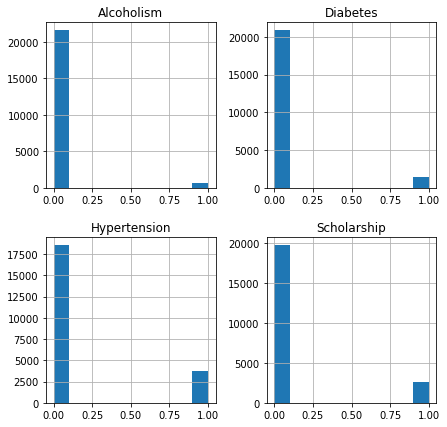

In [85]:
# extract the no-shown-up patients' data 
df_new_nshow = df_new[df_new.No_show == 'Yes']
df_new_nshow.hist(figsize = (7, 7));

> From the graphs above, we can see that more patients suffer hypertension than diabetes and alcoholism. 

<a id='sch'></a>
- **Scholarship**

In [86]:
# count the numbers of patients shown or non-shown by being covered by welfare or not
df['No_show'].groupby([df.Scholarship]).value_counts()

Scholarship  No_show
0            No         79910
             Yes        19732
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

In [87]:
# total number of patient with scholarship
df_sch = df[df.Scholarship == 1]
df_sch['No_show'].count()

10861

In [88]:
# total number of patient without scholarship
df_nsch = df[df.Scholarship == 0]
df_nsch['No_show'].count()

99642

In [89]:
# count the percentage of patients with scholarship who have not shown up
df_sch_nshow = df_sch[df_sch.No_show == 'Yes']
df_sch_nshow['No_show'].count()
sch_nshown = percentage(df_sch_nshow['No_show'].count(), df_sch['No_show'].count())
sch_nshown

0.2373630420771568

In [90]:
# count the percentage of patients without scholarship who have not shown up
df_nsch_nshow = df_nsch[df_nsch.No_show == 'Yes']
df_nsch_nshow['No_show'].count()
nsch_nshown = percentage(df_nsch_nshow['No_show'].count(), df_nsch['No_show'].count())
nsch_nshown

0.19802894361815299

>It seems that patients being covered by Bolsa Família, a social welfare program in Brazil, were less likely to attend their appointments than those who without welfare. 
The difference of attendance percentage is about 4%.

<a id='hy'></a>
- **Hypertension**

In [91]:
# count the numbers of patients shown or non-shown by with hypertension or not
df['No_show'].groupby([df.Hypertension]).value_counts()

Hypertension  No_show
0             No         70171
              Yes        18539
1             No         18022
              Yes         3771
Name: No_show, dtype: int64

In [92]:
# Total number of patient with hypertension
df_hy = df[df.Hypertension == 1]
df_hy['No_show'].count()

21793

In [93]:
# Total number of patient without hypertension
df_nhy = df[df.Hypertension == 0]
df_nhy['No_show'].count()

88710

In [94]:
# Count the percentage of patients with hypertension who have not shown up
df_hy_nshow = df_hy[df_hy.No_show == 'Yes']
df_hy_nshow['No_show'].count()
hy_nshown = percentage(df_hy_nshow['No_show'].count(), df_hy['No_show'].count())
hy_nshown

0.17303721378424264

In [95]:
# Count the percentage of patients without hypertension who have not shown up
df_nhy_nshow = df_nhy[df_nhy.No_show == 'Yes']
df_nhy_nshow['No_show'].count()
nhy_nshown = percentage(df_nhy_nshow['No_show'].count(), df_nhy['No_show'].count())
nhy_nshown

0.20898433096606922

>The absence of appointments for patients without hypertension is about 3.5% higer than those who with hypertension.

<a id='d'></a>
- **Diabetes**

In [96]:
# count the numbers of patients shown or non-shown by with diabetes or not
df['No_show'].groupby([df.Diabetes]).value_counts()

Diabetes  No_show
0         No         81683
          Yes        20880
1         No          6510
          Yes         1430
Name: No_show, dtype: int64

In [97]:
# Total number of patient with diabetes
df_d = df[df.Diabetes == 1]
df_d['No_show'].count()

7940

In [98]:
# Total number of patient without ciabetes
df_nd = df[df.Scholarship == 0]
df_nd['No_show'].count()

99642

In [99]:
# Count the percentage of patients with diabetes who have not shown up
df_d_nshow = df_d[df_d.No_show == 'Yes']
df_d_nshow['No_show'].count()
d_nshown = percentage(df_d_nshow['No_show'].count(), df_d['No_show'].count())
d_nshown

0.1801007556675063

In [100]:
# Count the percentage of patients without diabetes who have not shown up
df_nd_nshow = df_nd[df_nd.No_show == 'Yes']
df_nd_nshow['No_show'].count()
nd_nshown = percentage(df_nd_nshow['No_show'].count(), df_nd['No_show'].count())
nd_nshown

0.19802894361815299

>The absence of appointments for patients without diabetes is around 2% higer than those who with this maladie.

<a id='al'></a>
- **Alcoholism**

In [101]:
# count the numbers of patients shown or non-shown by with alcoholism or not
df['No_show'].groupby([df.Alcoholism]).value_counts()

Alcoholism  No_show
0           No         85510
            Yes        21633
1           No          2683
            Yes          677
Name: No_show, dtype: int64

In [102]:
# Total number of patient with alcoholism
df_al = df[df.Alcoholism == 1]
df_al['No_show'].count()

3360

In [103]:
# Total number of patient without alcoholism
df_nal = df[df.Alcoholism == 0]
df_nal['No_show'].count()

107143

In [104]:
# Count the percentage of patients with alcoholism who have not shown up
df_al_nshow = df_al[df_al.No_show == 'Yes']
df_al_nshow['No_show'].count()
al_nshown = percentage(df_al_nshow['No_show'].count(), df_al['No_show'].count())
al_nshown

0.20148809523809524

In [105]:
# Count the percentage of patients without alcoholism who have not shown up
df_nal_nshow = df_nal[df_nal.No_show == 'Yes']
df_nal_nshow['No_show'].count()
nal_nshown = percentage(df_nal_nshow['No_show'].count(), df_nal['No_show'].count())
nal_nshown

0.2019077307896923

>It seems that having alcoholism maladie is not a factor affecting patients' attendance for their medical appointments.

#### <span style="color:blue">*Figure: No-attendance percentage by other different characters* </span>

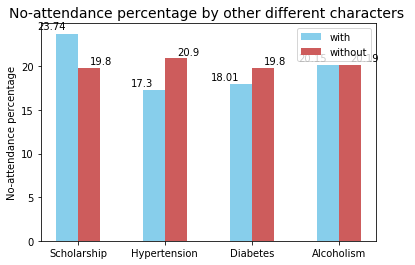

In [106]:
with_noshow = (round(sch_nshown*100,2), round(hy_nshown*100,2),round(d_nshown*100,2), round(al_nshown*100,2))
without_noshow = (round(nsch_nshown*100,2), round(nhy_nshown*100,2), round(nd_nshown*100,2), round(nal_nshown*100,2))

ind = np.arange(len(with_noshow))
width = 0.25

fig,ax = plt.subplots()
rects1 = ax.bar(ind - width/2, with_noshow, width,
                color='SkyBlue', label='with')
rects2 = ax.bar(ind + width/2, without_noshow, width,
                color='IndianRed', label='without')

ax.set_ylabel('No-attendance percentage')
ax.set_title('No-attendance percentage by other different characters ', fontsize = 14)
ax.set_xticks(ind)
ax.set_xticklabels(('Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism'))
ax.legend()

def autolabel(rects, xpos='center'):

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.55, 'left': 0.45}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")
plt.show()

<a id='conclusions'></a>
## Conclusions

In this public hospital in Brazil, there are 20.19% of patients who have not shown up during their scheduled meical appointments.

The factors following would **affect** the attendance:
> - ***Age***: The probability of attendances for people younger than 37 years-old (Yonng and Junior) is less than older people (Senior and Old). The attendanced percentage for Young, Junior, Senior and Old are as below: 78%, 76.5%, 80.5% and 84%.
> - ***Duration between scheduled day and appointment day***: Longer duration between scheduled day and appointment day, more patients will absent from the appointments: the attendance for duration between 5-15 days and of over 15 daysonly are only 71.5% and 67.3% of  respectively, compared with 95.3% for the same day and 77% for the duration between 2-4 days. Nearly 25% appointments are made for 15 days after. This should be a point to be considered to ameliorate.
> - ***Neighbourhood***: The location of the neighbourhood will affect 20% of patients to decide whether they show up their medical appointments.
> - ***SMS notificaiton***: SMS could be a useful way to remind patients for their appointments, which could increase 16.6% of chance for the attendance.
> - ***Scholarship***: The attendace of patients covered by Bolsa Família is 4% less than those who without welfare.
> - ***Hypertension***: The absence of appointments for patients without hypertension is about 3.6% higer than those who with hypertension.
> - ***Diabetes***: The absence of appointments for patients without diabetes is nearly 1.7% higer than those who with this maladie.


Other factors, such as ***weekday, patient's gender, being handicapped or not, being alcoholist or not *** would **not impact** the attendance. 
However, along with the investigation, we also notice that:
> - A bit more appointments are made on Tuesday and Wednesday than other business days, but very few on Saturday and no appointment on Sunday.
> - Around 35% appointment days are the same day as the scheduled days.
> - Compared with man, more woman tend to see doctor.
> - Even the non-shown-up percentage is almost equal between female and male patients, non-shown-up female are generally 5-6 years older than male.
> - Patients having hypertention maladie are more than those who having diabetes and alcoholism.

In conclusion, the neighbourhood and the SMS notification are two factors the most important impacting patients' attendance. Some other factors may also have more or less influence, such as age, length of duration between scheduled and appointment day, being covered by welfare or not, with maladie of hypertension and diabetes or not.

Several facotrs could not be ameliorated, like patients' ages or if they are hypertensive or diabetic. However, we still could find **two suggestions** to improve the attendance:

- **sending the SMS notification** to every patient who made appointment;
- trying to **made the appointment as quick as possible**, limit to less than 15 days.

Though the investigation carried out in this study is exploratory and could provide insights for future, we should notice that the above obervations are only applied to the nominated hospital in Brazil. Also, some **limitations** of this study are as following:
- 110503 appointments for 62286 patients as sample is investigated. We do not know the number of the population. Therefore,  ***all statistics done are only descriptive***, they should not be interpreted as a predictive model;
- 95% of analysis are merely looked at the relationship between attendance and one factor. ***The interrelationship between different features are not (sufficiently) investigated***.
